# Banknote Classifier

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


## Create a Dataset class

All the banknotes images web scraped on Google Image have been structured in different folders, named by the banknote value (5€, 10€, 20€, 50€, 100€, 200€ and 500€). These folders are located on Google Drive, so the objective now is to create a Custom Dataset class to store each category of banknote in different arrays, one dedicated to the training of the model, and another one dedicated to the testing of the model (convolutional neural network) - without forgetting to store the corresponding labels for each image. The number of images will be balanced between categories as we have around 150 images for each banknote value. 80% of the images will be used for training and 20% will be used for testing.

In [ ]:
class CreateDataset(Dataset):
  def __init__(self, transform = None, train = True):

    self.transform = transform

    toTensor = transforms.Compose([transforms.ToTensor()])
    directory = "/content/drive/MyDrive/Kaggle-Datasets/Banknote-classifier"
    five = "5€"
    five_path = os.path.join(directory, five)
    five_files = [os.path.join(five_path, file) for file in os.listdir(five_path) if file.endswith(".jpg") and toTensor(Image.open(os.path.join(five_path, file))).shape[0] == 3]

    five_train_files = random.sample(five_files, k = round(len(five_files) * 0.8))
    five_test_files = list(set(five_files) - set(five_train_files))

    ten = "10€"
    ten_path = os.path.join(directory, ten)
    ten_files = [os.path.join(ten_path, file) for file in os.listdir(ten_path) if file.endswith(".jpg") and toTensor(Image.open(os.path.join(ten_path, file))).shape[0] == 3]

    ten_train_files = random.sample(ten_files, k = round(len(ten_files) * 0.8))
    ten_test_files = list(set(ten_files) - set(ten_train_files))

    twenty = "20€"
    twenty_path = os.path.join(directory, twenty)
    twenty_files = [os.path.join(twenty_path, file) for file in os.listdir(twenty_path) if file.endswith(".jpg") and toTensor(Image.open(os.path.join(twenty_path, file))).shape[0] == 3]

    twenty_train_files = random.sample(twenty_files, k = round(len(twenty_files) * 0.8))
    twenty_test_files = list(set(twenty_files) - set(twenty_train_files))

    fifty = "50€"
    fifty_path = os.path.join(directory, fifty)
    fifty_files = [os.path.join(fifty_path, file) for file in os.listdir(fifty_path) if file.endswith(".jpg") and toTensor(Image.open(os.path.join(fifty_path, file))).shape[0] == 3]

    fifty_train_files = random.sample(fifty_files, k = round(len(fifty_files) * 0.8))
    fifty_test_files = list(set(fifty_files) - set(fifty_train_files))

    one_hundred = "100€"
    one_hundred_path = os.path.join(directory, one_hundred)
    one_hundred_files = [os.path.join(one_hundred_path, file) for file in os.listdir(one_hundred_path) if file.endswith(".jpg") and toTensor(Image.open(os.path.join(one_hundred_path, file))).shape[0] == 3]

    one_hundred_train_files = random.sample(one_hundred_files, k = round(len(one_hundred_files) * 0.8))
    one_hundred_test_files = list(set(one_hundred_files) - set(one_hundred_train_files))

    two_hundred = "200€"
    two_hundred_path = os.path.join(directory, two_hundred)
    two_hundred_files = [os.path.join(two_hundred_path, file) for file in os.listdir(two_hundred_path) if file.endswith(".jpg") and toTensor(Image.open(os.path.join(two_hundred_path, file))).shape[0] == 3]

    two_hundred_train_files = random.sample(two_hundred_files, k = round(len(two_hundred_files) * 0.8))
    two_hundred_test_files = list(set(two_hundred_files) - set(two_hundred_train_files))

    five_hundred = "500€"
    five_hundred_path = os.path.join(directory, five_hundred)
    five_hundred_files = [os.path.join(five_hundred_path, file) for file in os.listdir(five_hundred_path) if file.endswith(".jpg") and toTensor(Image.open(os.path.join(five_hundred_path, file))).shape[0] == 3]

    five_hundred_train_files = random.sample(five_hundred_files, k = round(len(five_hundred_files) * 0.8))
    five_hundred_test_files = list(set(five_hundred_files) - set(five_hundred_train_files))

    if train:
      self.all_files = five_train_files + ten_train_files + twenty_train_files + fifty_train_files + one_hundred_train_files + two_hundred_train_files + five_hundred_train_files
      self.Y = torch.tensor([0] * len(five_train_files) + [1] * len(ten_train_files) + [2] * len(twenty_train_files) + [3] * len(fifty_train_files) + [4] * len(one_hundred_train_files) + [5] * len(two_hundred_train_files) + [6] * len(five_hundred_train_files), dtype=torch.long)
    else:
      self.all_files = five_test_files + ten_test_files + twenty_test_files + fifty_test_files + one_hundred_test_files + two_hundred_test_files + five_hundred_test_files
      self.Y = torch.tensor([0] * len(five_test_files) + [1] * len(ten_test_files) + [2] * len(twenty_test_files) + [3] * len(fifty_test_files) + [4] * len(one_hundred_test_files) + [5] * len(two_hundred_test_files) + [6] * len(five_hundred_test_files), dtype=torch.long)
      
  def __getitem__(self, idx):
    image = Image.open(self.all_files[idx])
    if self.transform:
      image = self.transform(image)
    y = self.Y[idx]
    return image, y

  def __len__(self):
    return len(self.all_files)


In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((64,64))])
train_dataset = CreateDataset(transform=transform)
test_dataset = CreateDataset(transform=transform, train=False)

train_loader = DataLoader(dataset=train_dataset, batch_size=10)
test_loader = DataLoader(dataset=test_dataset, batch_size=10)

In [ ]:
print("Number of images in the training dataset :", len(train_dataset))
print("Number of images in the testing dataset :", len(test_dataset))

Number of images in the training dataset : 781
Number of images in the testing dataset : 194


## Detect corrupted files

As we have a lot of images in our categories of banknotes, we need to detect if some of them are corrupted to delete them before training the neural network. When we first created the train and test dataloaders, a warning appeared and indicated us that one of the files was corrupted. This problem can be handled by opening each of the images, checking their integrity.

In [ ]:
twenty = "20€"
twenty_path = os.path.join(directory, twenty)
twenty_files = [os.path.join(twenty_path, file) for file in os.listdir(twenty_path) if file.endswith(".jpg") and toTensor(Image.open(os.path.join(twenty_path, file))).shape[0] == 3]

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [ ]:
import warnings
warnings.filterwarnings('error')

listImages = os.listdir(twenty_path)

for i, img in enumerate(listImages):
    imgPath = os.path.join(twenty_path,img)
            
    try:
        img = Image.open(imgPath)
        exif_data = img._getexif()
        img.close()
    except UserWarning as err:
        print("Error on image: ", img)

Error on image:  46.l_new20euros.jpg


## Create the model

In [5]:
class NeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, padding=1)
    self.max1 = nn.MaxPool2d(kernel_size=2)
    self.conv2 = nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, padding=1)
    self.max2 = nn.MaxPool2d(kernel_size=2)
    self.fc1 = nn.Linear(in_features=12*32*32, out_features=7)
  
  def forward(self, x):
    x = self.conv1(x) # N,3,64,64 -> N,12,64,64
    x = torch.relu(x) # 
    x = self.max1(x) # N,12,64,64 -> N,12,32,32
    x = self.conv2(x) #
    x = torch.relu(x) #
    x = self.fc1(x.reshape((x.shape[0],-1))) #  N,12,32,32 -> 12,32*32
    return x

## Train and test the neural network

In [ ]:
model = NeuralNet().to(device)
criterion = nn.CrossEntropyLoss()
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(),lr=lr)
epochs = 100
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(epochs):
  train_loss = 0
  correct = 0
  for x, y in tqdm(train_loader):
    x = x.to(device)
    y = y.to(device)
    z = model(x)
    _, yhat = torch.max(z, 1)
    loss = criterion(z, y)
    train_loss += loss.item()
    correct += torch.sum(yhat == y).item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_losses.append(train_loss)
  train_accuracies.append(correct/len(train_dataset))

  test_loss = 0
  correct = 0
  for x, y in tqdm(test_loader):
    x = x.to(device)
    y = y.to(device)
    z = model(x)
    _, yhat = torch.max(z, 1)
    loss = criterion(z, y)
    test_loss += loss.item()
    correct += torch.sum(yhat == y).item()
  test_losses.append(test_loss)
  test_accuracies.append(correct/len(test_dataset))
  best_test_accuracy = max(test_accuracies)
  if test_accuracies[-1] >= best_test_accuracy:
    FILE = "best_model.pth"
    torch.save(model.state_dict(), FILE)

100%|██████████| 20/20 [00:07<00:00,  2.76it/s]


In [ ]:
data = {"train_losses":train_losses,"test_losses":test_losses,"train_accuracies":train_accuracies,"test_accuracies":test_accuracies}
torch.save(data,"plot_data.pth")

## Plot the results

In [67]:
import seaborn as sns
import numpy as np
import pandas as pd

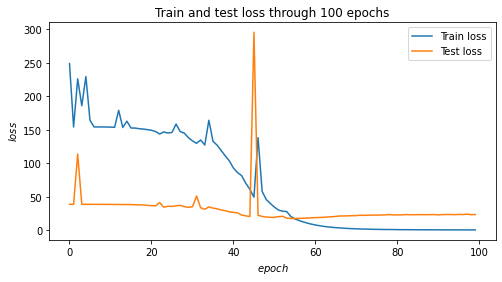

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

ax1.plot(train_losses, label='Train loss')
ax1.plot(test_losses, label='Test loss')
ax1.set_title("Train and test loss through 100 epochs")
ax1.set_xlabel('$epoch$')
ax1.set_ylabel('$loss$')
ax1.legend()

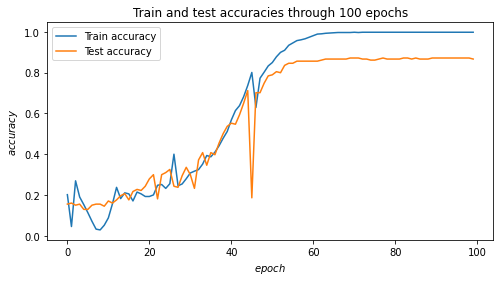

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

ax1.plot(train_accuracies, label='Train accuracy')
ax1.plot(test_accuracies, label='Test accuracy')
ax1.set_title("Train and test accuracies through 100 epochs")
ax1.set_xlabel('$epoch$')
ax1.set_ylabel('$accuracy$')
ax1.legend()

## Build a Dataframe

In [ ]:
train_losses_np = np.array(train_losses)
train_accuracies_np = np.array(train_accuracies)
train_label = np.array(["train"]*len(train_losses))

test_losses_np = np.array(test_losses)
test_accuracies_np = np.array(test_accuracies)
test_label = np.array(["test"]*len(train_losses))

id = np.array(range(100))

train_losses_accuracies = np.concatenate((train_losses_np.reshape((-1,1)), train_accuracies_np.reshape((-1,1)), train_label.reshape((-1,1)), id.reshape((-1,1))), axis=1)
test_losses_accuracies = np.concatenate((test_losses_np.reshape((-1,1)), test_accuracies_np.reshape((-1,1)), test_label.reshape((-1,1)), id.reshape((-1,1))), axis=1)

In [ ]:
train_test_losses_accuracies = np.concatenate((train_losses_accuracies, test_losses_accuracies), axis=0)
df = pd.DataFrame(train_test_losses_accuracies, columns=['loss', 'accuracy', 'phase', 'id'])
df.head()

,loss,accuracy,phase,id
0,248.89057093041924,0.20102432778489115,train,0
1,154.28996884822845,0.04481434058898848,train,1
2,226.08077692511648,0.26888604353393086,train,2
3,186.0062303096056,0.18950064020486557,train,3
4,229.3750921357423,0.1523687580025608,train,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   loss      200 non-null    object
 1   accuracy  200 non-null    object
 2   phase     200 non-null    object
 3   id        200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [ ]:
df[['accuracy','loss','id']] = df[['accuracy','loss','id']].astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   loss      200 non-null    float64
 1   accuracy  200 non-null    float64
 2   phase     200 non-null    object 
 3   id        200 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.4+ KB


## Visualization with Seaborn

Text(0.5, 0, 'epoch')

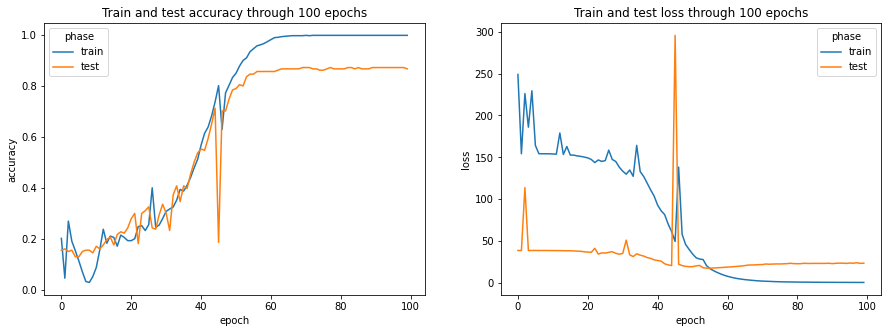

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

sns.lineplot(x=df['id'], y=df['accuracy'], hue=df['phase'], ax=ax1)
sns.lineplot(x=df['id'], y=df['loss'], hue=df['phase'], ax=ax2)
ax1.set_title('Train and test accuracy through 100 epochs')
ax1.set_xlabel('epoch')
ax2.set_title('Train and test loss through 100 epochs')
ax2.set_xlabel('epoch')

In [ ]:
print("Best train accuracy:", max(train_accuracies))
print("Best test accuracy:", best_test_accuracy)

print("Minimum train loss:", min(train_losses))
print("Minimum test loss:", min(test_losses))

Best train accuracy: 0.9974391805377721
Best test accuracy: 0.8711340206185567
Minimum train loss: 0.8043550918373512
Minimum test loss: 17.817598208785057


## Check misclassified samples

In [ ]:
misclassified_images_index = []
for i in range(len(test_dataset)):
  if test_dataset[i][1].item() != torch.max(model(test_dataset[i][0].reshape((1,3,64,64))),1).indices[0].item():
    misclassified_images_index.append([i, torch.max(model(test_dataset[i][0].reshape((1,3,64,64))),1).indices[0].item(), test_dataset[i][1].item()])

In [ ]:
len(misclassified_images_index)

26

In [ ]:
test_data = {"test_dataset": test_dataset, "misclassified_images_index": misclassified_images_index}
torch.save(test_data, "misclassified_images.pth")

Print the ten first misclassified samples:

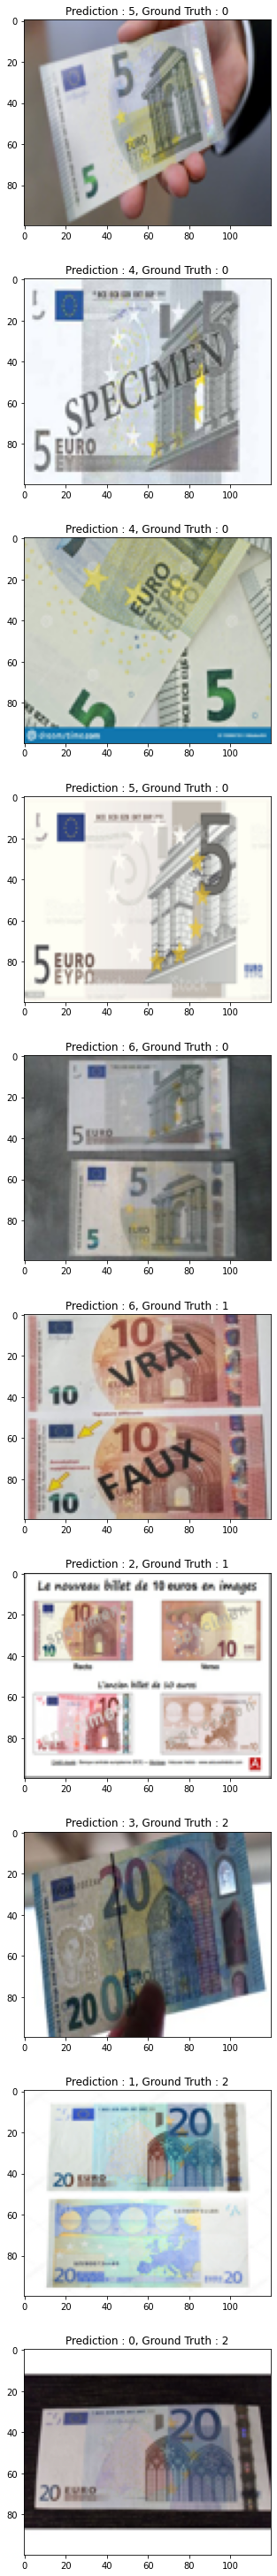

In [ ]:
fig, axes = plt.subplots(nrows=10,figsize=(5,20))
plt.subplots_adjust(bottom = 1, top = 3)
for i, ax in enumerate(axes):
  ax.imshow(Image.open(test_dataset.all_files[misclassified_images_index[i][0]]).resize((120,100)))
  ax.set_title(f'Prediction : {misclassified_images_index[i][1]}, Ground Truth : {misclassified_images_index[i][2]}')

## Load and Try the best model

In [3]:
with open('best_model.pth', 'rb') as f:
  best_model = torch.load(f)

In [6]:
new_model = NeuralNet()
new_model.load_state_dict(best_model)

<All keys matched successfully>

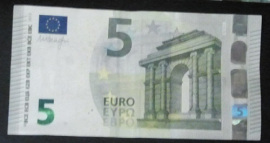

In [49]:
bill = Image.open('/content/5-euro-paper.jpg')
bill

In [50]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((64,64))])
bill = transform(bill)
bill.shape

torch.Size([3, 64, 64])

In [62]:
z = new_model(bill.reshape((1,3,64,64)))
z = torch.softmax(z, dim=1) # Apply a softmax function to the array to get the corresponding probability of each class
_, yhat = torch.max(z, 1) # Check the argmax (column index of the maximum value in the z array)
print(z)
print("Predicted label:", yhat[0].item())

tensor([[9.9708e-01, 2.2007e-03, 1.1832e-07, 4.9150e-06, 2.1351e-09, 7.1468e-04,
         4.5633e-08]], grad_fn=<SoftmaxBackward>)
Predicted label: 0


Remember the corresponding labels for each banknote value are the following :

Banknote | Label
:--:|--
**5€** | 0 
**10€** | 1 
**20€** | 2 
**50€** | 3 
**100€** | 4 
**200€** | 5
**500€** | 6

Our image represents a 5€ banknote and the prediction we get is label 0.

We check the table and we see that the model is right, the banknote is correctly classified!

## Plot the prediction confidence

In [104]:
labels = ['5€', '10€', '20€', '50€', '100€', '200€', '500€']

In [103]:
z[0].detach()

tensor([9.9708e-01, 2.2007e-03, 1.1832e-07, 4.9150e-06, 2.1351e-09, 7.1468e-04,
        4.5633e-08])

Text(0, 0.5, 'Probability')

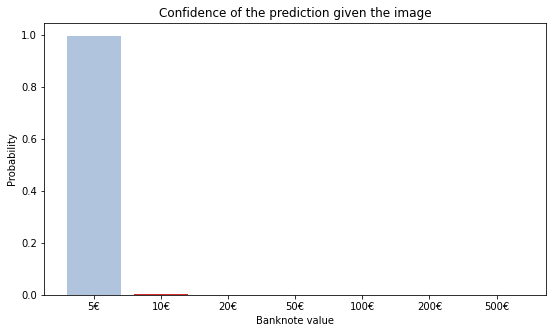

In [107]:
fig, ax = plt.subplots(ncols=1, figsize=(9, 5), sharey=True)

colors = ['lightsteelblue','tab:red','tab:blue','tab:orange','tab:green', 'gold', 'tab:purple']

ax.bar(labels, z[0].detach(), color=colors)
ax.set_title("Confidence of the prediction given the image")
ax.set_xlabel("Banknote value")
ax.set_ylabel("Probability")


Given the plot above, we can finally be almost 100% sure the image really represents a 5€ banknote!